# Cotton Disease Prediction


In [1]:
# Importing Required Libraries

import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
%matplotlib inline

Preprocessing

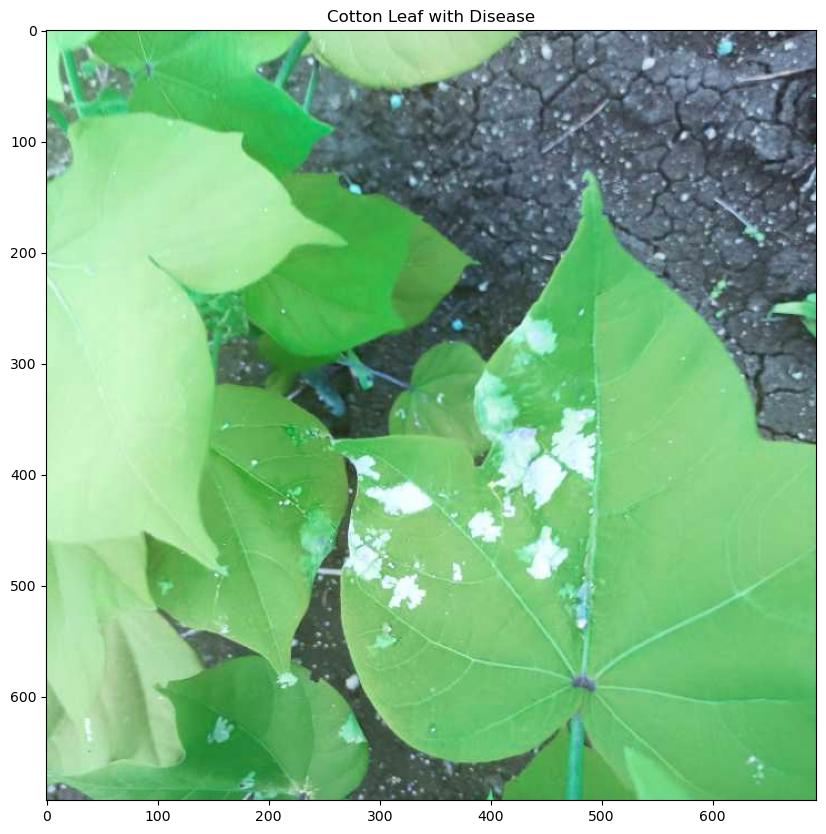

In [3]:
image=cv2.imread('Datasets/train/diseased cotton leaf/dis_leaf (101)_iaip.jpg')
plt.figure(figsize=(10,10))
plt.title("Cotton Leaf with Disease")
plt.imshow(image)

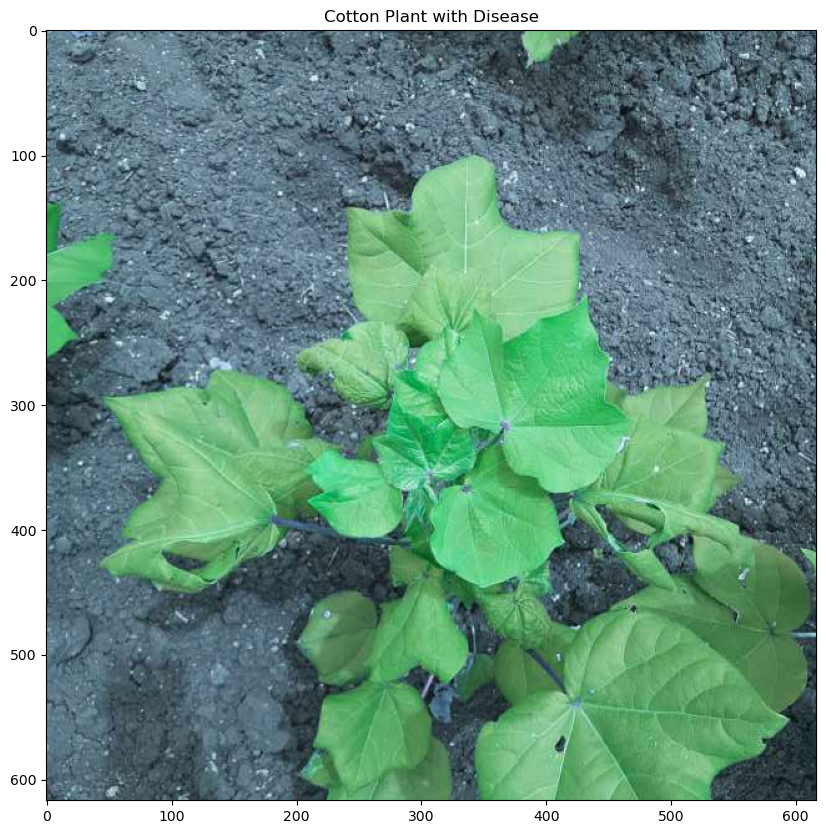

In [4]:
image=cv2.imread('Datasets/train/diseased cotton plant/dd (104)_iaip.jpg')
plt.figure(figsize=(10,10))
plt.title("Cotton Plant with Disease")
plt.imshow(image)

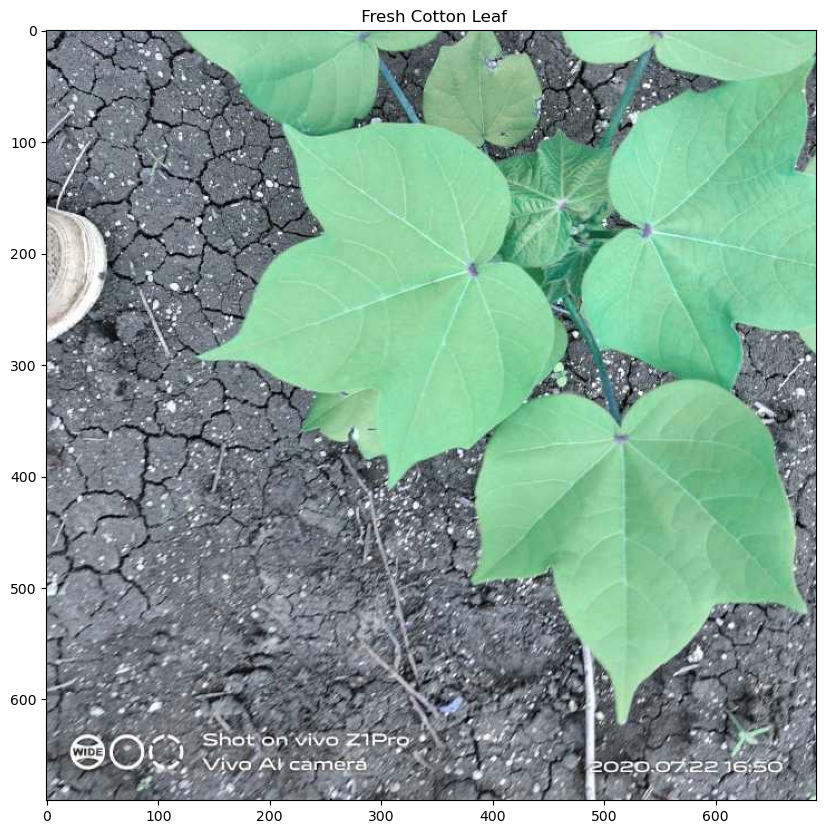

In [5]:
image = cv2.imread('Datasets/train/fresh cotton leaf/d (100)_iaip.jpg')
type(image)
plt.figure(figsize=(10,10)) 
plt.title(' Fresh Cotton Leaf')
plt.imshow(image)

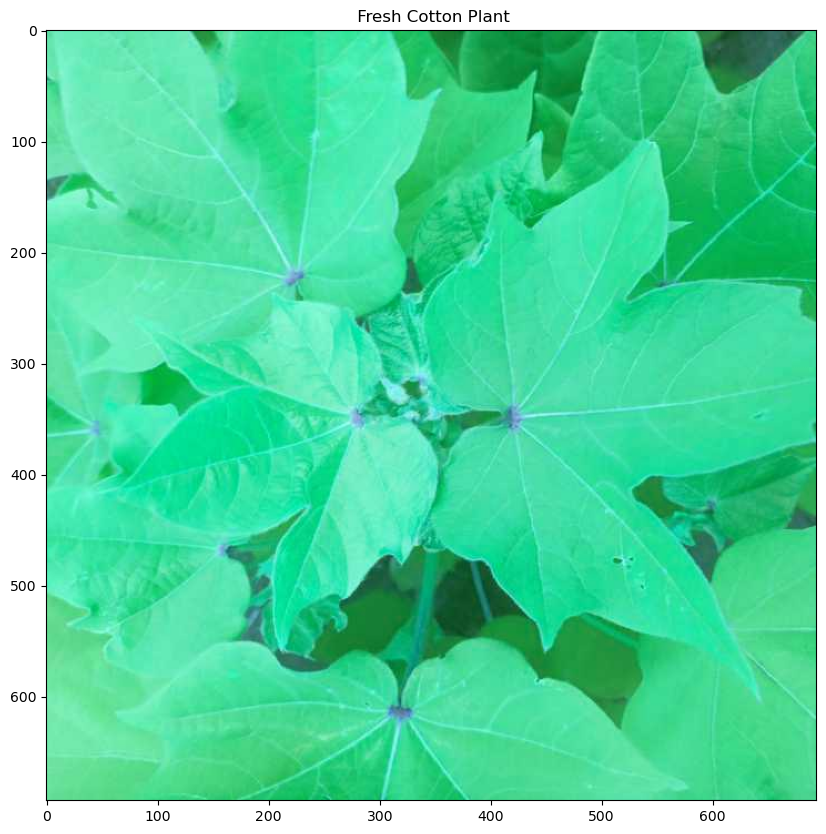

In [6]:
image = cv2.imread('Datasets/train/fresh cotton plant/dsd (143)_iaip.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Fresh Cotton Plant')
plt.imshow(image)

In [7]:
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
test_datagenerator = ImageDataGenerator(rescale = 1.0/255)

In [8]:
train_data = train_datagenerator.flow_from_directory('Datasets/train',
                                                    target_size = (256,256),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [9]:
test_data = test_datagenerator.flow_from_directory('Datasets/val',
                                                  target_size = (256,256),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

Found 253 images belonging to 4 classes.


Building Model

In [10]:
# CNN Model
cnn=tf.keras.models.Sequential()

In [11]:
# Convolution 
cnn.add(tf.keras.layers.Conv2D(filters=64, padding="same", kernel_size=3, activation='relu', input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=64, padding="same", kernel_size=3, activation='relu'))


In [12]:
# pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))

In [14]:
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
#flaterning
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [16]:
# Compiling the CNN

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Training the CNN on the Training set and evaluating it on the Test set

history=cnn.fit(x=train_data, validation_data=test_data, epochs=10)

Epoch 1/10


61/61 [==============================] - 1892s 30s/step - loss: 1.3296 - accuracy: 0.4208 - val_loss: 1.3208 - val_accuracy: 0.3913
Epoch 2/10
61/61 [==============================] - 5112s 85s/step - loss: 1.0949 - accuracy: 0.5392 - val_loss: 1.1094 - val_accuracy: 0.5336
Epoch 3/10
61/61 [==============================] - 809s 12s/step - loss: 1.0121 - accuracy: 0.5884 - val_loss: 0.9816 - val_accuracy: 0.5613
Epoch 4/10
61/61 [==============================] - 721s 12s/step - loss: 0.9639 - accuracy: 0.5961 - val_loss: 0.8667 - val_accuracy: 0.6245
Epoch 5/10
61/61 [==============================] - 710s 12s/step - loss: 0.8467 - accuracy: 0.6684 - val_loss: 0.7575 - val_accuracy: 0.6719
Epoch 6/10
61/61 [==============================] - 713s 12s/step - loss: 0.7784 - accuracy: 0.6914 - val_loss: 0.6186 - val_accuracy: 0.7233
Epoch 7/10
61/61 [==============================] - 716s 12s/step - loss: 0.7064 - accuracy: 0.7289 - val_loss: 0.4812 - val_accuracy: 0.8063
Ep

In [19]:
import matplotlib.pyplot as plt

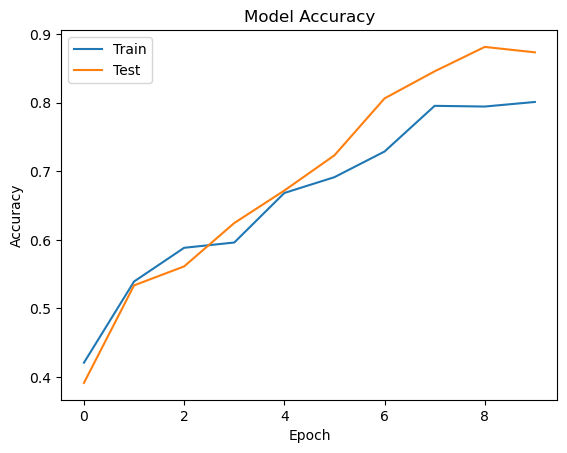

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()